A textile company regularly spent money on five advertising companies for their ads. (Dataset added along with)

1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

2. Build a regression model to predict the profit from the given data and comment your findings on it.

3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

Add1(in Thousands) 290

Add2(in Thousands) 312

Add3(in Thousands) 309

Add4(in Thousands) 298

Add5(in Thousands) 320

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Add_sales_data_2018.csv")

In [3]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
df.shape

(205, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [8]:
df.dtypes

Date                     object
Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

In [11]:
df.set_index("Date",inplace=True)

In [12]:
df.head(2)

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Date,,,,,,
2018-10-08,208.0,222.25,206.85,216.00,215.15,4093.065
2018-10-05,217.0,218.60,205.90,210.25,209.20,4042.448


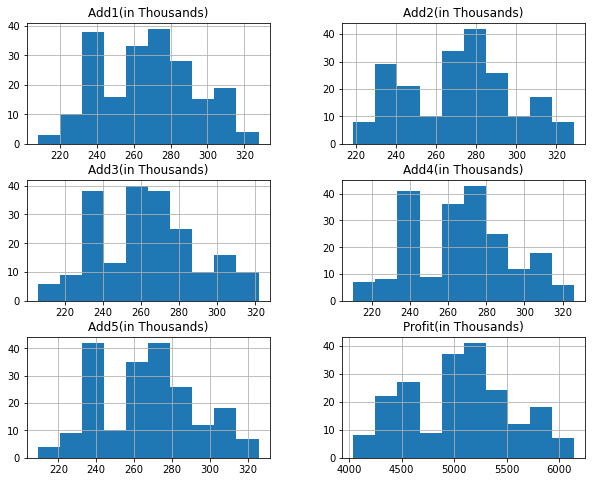

In [14]:
freqgraph=df.select_dtypes(include=['float64'])
freqgraph.hist(figsize=(10,8))
plt.show()

The amounts spent on each adds lies in the interval of 20k and 32k. these 6  graphs saying that adds and profit are normally distributed

Text(0, 0.5, 'Amount spent on adds')

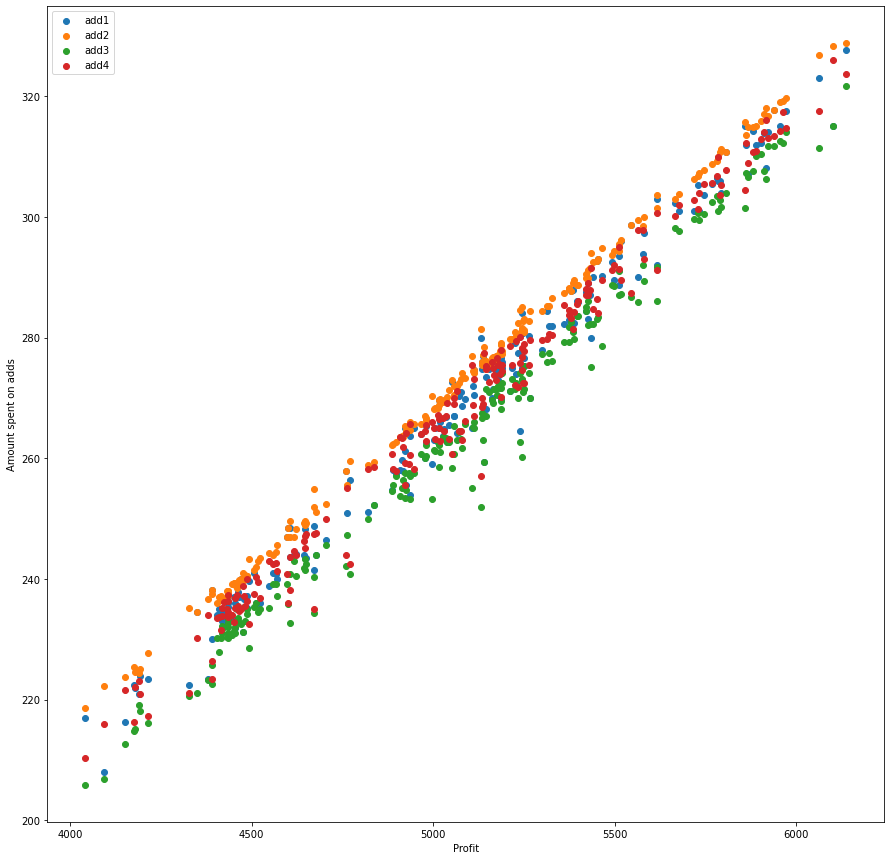

In [17]:
plt.figure(figsize=(15,15))
plt.scatter(df['Profit(in Thousands)'],df['Add1(in Thousands)'],label='add1')
plt.scatter(df['Profit(in Thousands)'],df['Add2(in Thousands)'],label='add2')
plt.scatter(df['Profit(in Thousands)'],df['Add3(in Thousands)'],label='add3')
plt.scatter(df['Profit(in Thousands)'],df['Add4(in Thousands)'],label='add4')
plt.legend()
plt.xlabel("Profit")
plt.ylabel("Amount spent on adds")

From the graph we can see that profit is propotional to adds and showing all are correlated to each other. 

In [18]:
#lets checck the correlation using heatmap

Text(0.5, 1.0, 'Correlation between variables')

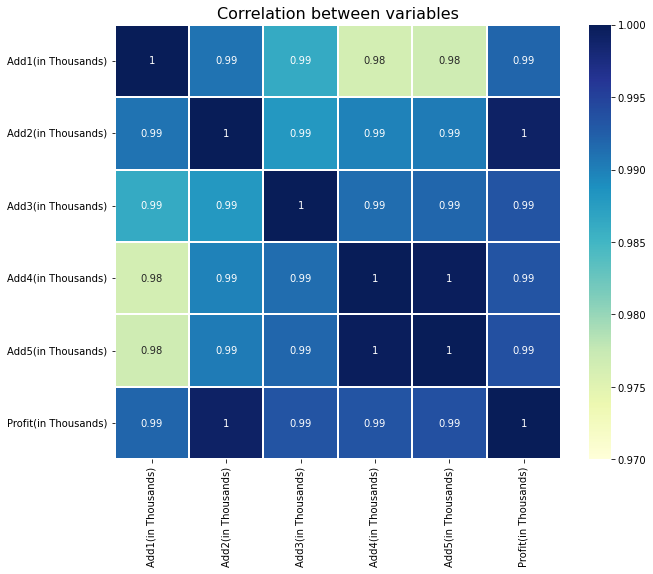

In [23]:
corrmatrix=df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix, vmin=.97,vmax=1,linewidths=.2,annot=True,cmap='YlGnBu')
plt.title('Correlation between variables',fontsize=16)

here we can understand that every variables are highly correlated to each other
and also Add 2 is having the highest correlation with the target column

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [24]:
#we have to check outliers

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Add1(in Thousands)'),
  Text(1, 0, 'Add2(in Thousands)'),
  Text(2, 0, 'Add3(in Thousands)'),
  Text(3, 0, 'Add4(in Thousands)'),
  Text(4, 0, 'Add5(in Thousands)'),
  Text(5, 0, 'Profit(in Thousands)')])

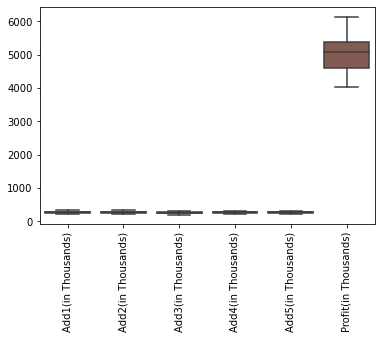

In [25]:
sns.boxplot(data=df)
plt.xticks(rotation=90)

No outliers exist on this dataset

In [27]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [29]:
# splitting the data
X=df.drop(['Profit(in Thousands)'],axis=1)
Y=df['Profit(in Thousands)']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=.25)

In [33]:
from sklearn import linear_model

In [34]:
lr=linear_model.LinearRegression()

In [35]:
model = lr.fit(X_train,Y_train)
predictions = model.predict(X_test)

In [36]:
print(Y_test)

Date
2018-09-12    4152.066
2018-09-24    4446.441
2018-05-14    5131.898
2018-03-26    4907.560
2018-06-27    5004.282
2018-05-21    4623.793
2018-02-14    5384.175
2018-02-08    5328.025
2018-03-05    5175.051
2018-01-10    5956.323
2017-12-28    5780.799
2018-02-06    4997.719
2018-07-02    5075.858
2018-01-19    5784.540
2018-06-20    4936.120
2018-02-23    5065.652
2018-09-07    4190.965
2018-06-07    5034.726
2018-06-01    5015.536
2018-03-09    5134.657
2018-07-09    5145.131
2018-05-11    5421.940
2018-05-16    4569.293
2018-08-21    4598.292
2018-08-29    4436.321
2018-09-11    4175.677
2018-01-31    5616.791
2017-12-21    5667.250
2018-05-17    4648.834
2017-12-22    5717.838
2018-06-28    5001.615
2018-04-13    5182.368
2018-02-21    5017.503
2017-12-12    5545.013
2018-06-12    5013.207
2018-06-26    5030.451
2018-03-07    5108.626
2018-07-16    4760.877
2018-07-30    4606.340
2018-06-05    4925.861
2018-03-06    5250.788
2018-06-29    5038.222
2018-04-26    5491.792
2018-0

In [37]:
print(predictions)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


In [38]:
from sklearn.metrics import mean_squared_error

print("MSE:", mean_squared_error(Y_test,predictions))

MSE: 6.362927788869444e-25


Here the MSE value is close to zero , so our model is efficient in predicting the target values

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

Add1(in Thousands) 290

Add2(in Thousands) 312

Add3(in Thousands) 309

Add4(in Thousands) 298

Add5(in Thousands) 320

In [39]:
make_pred=[[290,312,309,298,320]]
model.predict(make_pred).item()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


5820.060000000001

5820.06 is the predicted value from our model for the given independent values